In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Generic Packages
import numpy as np
import os
import pandas as pd

#Machine Learning Library
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt

#openCV
import cv2

#Tensor Flow
import tensorflow as tf
from tensorflow.keras import models

#Display Progress
from tqdm import tqdm

#Model Libraries
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from keras.models import Sequential


In [ ]:
class_names=["eczema","healthy","keratosis_pilaris","melanoma","rosacea"]
class_names_label={class_name:i for i,class_name in enumerate(class_names)}
nb_classes=len(class_names)
img_size=(150,150)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

class_names = ["eczema", "healthy", "keratosis_pilaris", "melanoma", "rosacea"]
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
img_size = (150, 150)


def load_data():
    path = '/content/drive/MyDrive/all_dataset_deneme2'
    images = []
    labels = []

    print("Loading dataset from {}".format(path))

    label_encoder = LabelEncoder()

    for foldername in os.listdir(path):
        folderpath = os.path.join(path, foldername)
        if os.path.isdir(folderpath):
            label = class_names_label[foldername]

            for filename in tqdm(os.listdir(folderpath)):
                filepath = os.path.join(folderpath, filename)
                if os.path.isfile(filepath) and filename.endswith('.jpg'):
                    image = cv2.imread(filepath)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, img_size)
                    images.append(image)
                    labels.append(label)

    images = np.array(images, dtype='float32')
    labels = label_encoder.fit_transform(labels)

    train_img, test_img, train_lab, test_lab = train_test_split(images, labels, test_size=0.2, random_state=42)

    return train_img, train_lab, test_img, test_lab





In [ ]:
train_img, train_lab, test_img, test_lab = load_data()


Loading dataset from /content/drive/MyDrive/all_dataset_deneme2


100%|██████████| 178/178 [00:01<00:00, 108.96it/s]


In [ ]:
train_img,train_lab=shuffle(train_img,train_lab,random_state=25)

In [ ]:
nb_train=train_lab.shape[0]
nb_test=test_lab.shape[0]
print ("Number of training examples: {}".format(nb_train))
print ("Number of testing examples: {}".format(nb_test))
print ("Each image is of size: {}".format(img_size))

Number of training examples: 776
Number of testing examples: 195
Each image is of size: (150, 150)


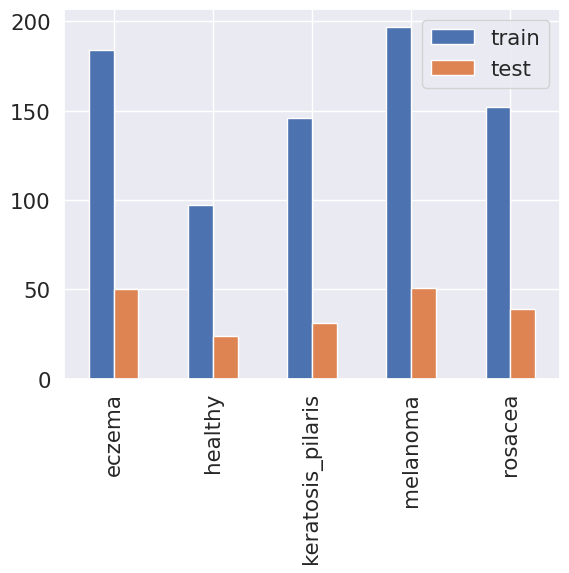

In [ ]:
_,train_counts=np.unique(train_lab,return_counts=True)
_,test_counts=np.unique(test_lab,return_counts=True)
pd.DataFrame({'train':train_counts,'test':test_counts},index=class_names).plot.bar()
plt.show()

In [ ]:
train_img=train_img/255.0
test_img=test_img/255.0

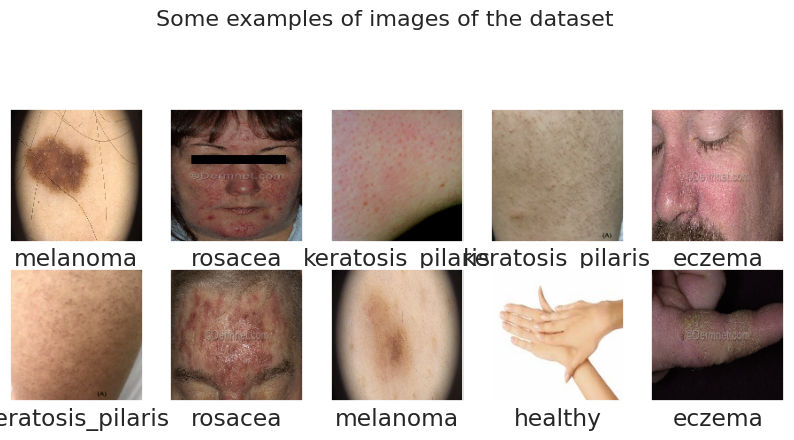

In [ ]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_examples(class_names, train_img, train_lab)

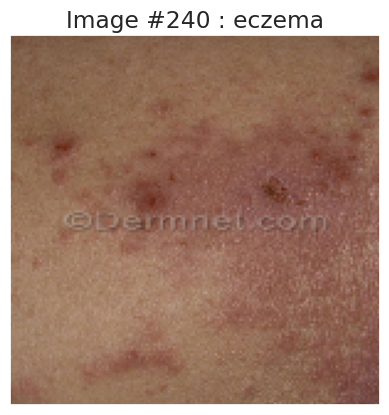

In [ ]:
def display_random_img(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()


display_random_img (class_names, train_img, train_lab)

In [ ]:
cnn_model=models.Sequential()
cnn_model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(32,(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(5, activation="softmax"))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(train_img, train_lab, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
5/5 [==============================] - 21s 4s/step - loss: 3.1297 - accuracy: 0.2532 - val_loss: 1.8146 - val_accuracy: 0.3269
Epoch 2/10
5/5 [==============================] - 21s 4s/step - loss: 1.6404 - accuracy: 0.3242 - val_loss: 1.3847 - val_accuracy: 0.5705
Epoch 3/10
5/5 [==============================] - 20s 4s/step - loss: 1.3481 - accuracy: 0.5097 - val_loss: 1.2251 - val_accuracy: 0.5385
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 1.2106 - accuracy: 0.5403 - val_loss: 1.0280 - val_accuracy: 0.5897
Epoch 5/10
5/5 [==============================] - 19s 4s/step - loss: 1.0233 - accuracy: 0.6274 - val_loss: 0.8755 - val_accuracy: 0.6282
Epoch 6/10
5/5 [==============================] - 19s 4s/step - loss: 0.8407 - accuracy: 0.7081 - val_loss: 0.7938 - val_accuracy: 0.6859
Epoch 7/10
5/5 [==============================] - 28s 6s/step - loss: 0.7102 - accuracy: 0.7242 - val_loss: 0.7554 - val_accuracy: 0.7179
Epoch 8/10
5/5 [==================

In [ ]:
def accuracy_plot(hist):
    val_acc1=hist.history['val_accuracy']
    acc1=hist.history['accuracy']
    epochs1 = range(1, len(acc1) + 1)
    plt.plot(epochs1, acc1, 'b')
    plt.plot (epochs1, val_acc1, 'r-')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','validation'])
    plt.show()

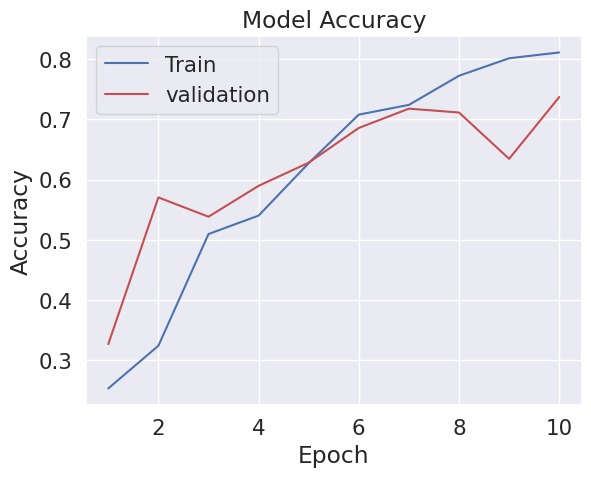

In [ ]:
accuracy_plot(cnn_history)

7/7 [==============================] - 2s 203ms/step


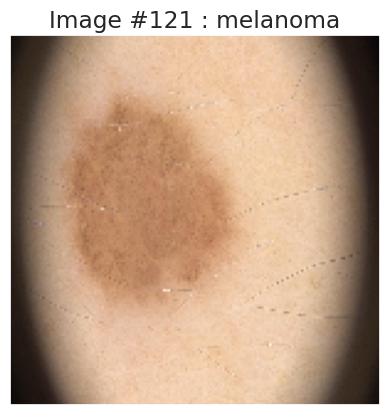

In [ ]:
predictions = cnn_model.predict(test_img)     # Vector of probabilities
pred_lab = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_img(class_names, test_img, pred_lab)

In [ ]:
ann_model = models.Sequential()
ann_model.add(Flatten(input_shape=(150, 150, 3)))  # Add a flatten layer to reshape the input
ann_model.add(Dense(128, activation="relu"))
ann_model.add(Dense(5, activation="softmax"))


ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing images for the ANN model
train_img_flatten = train_img.reshape(train_img.shape[0], -1)
test_img_flatten = test_img.reshape(test_img.shape[0], -1)

# Reshape the input data
train_img_reshaped = train_img.reshape(train_img.shape[0], 150, 150, 3)
test_img_reshaped = test_img.reshape(test_img.shape[0], 150, 150, 3)

# Fit the ANN model
ann_history = ann_model.fit(train_img_reshaped, train_lab, batch_size=128, epochs=20, validation_split=0.2)



Epoch 1/20
5/5 [==============================] - 3s 516ms/step - loss: 54.4190 - accuracy: 0.2161 - val_loss: 49.3420 - val_accuracy: 0.2115
Epoch 2/20
5/5 [==============================] - 2s 393ms/step - loss: 43.3719 - accuracy: 0.2419 - val_loss: 17.2039 - val_accuracy: 0.3269
Epoch 3/20
5/5 [==============================] - 1s 234ms/step - loss: 24.0966 - accuracy: 0.2565 - val_loss: 27.0344 - val_accuracy: 0.2949
Epoch 4/20
5/5 [==============================] - 1s 232ms/step - loss: 15.5540 - accuracy: 0.3290 - val_loss: 11.8600 - val_accuracy: 0.2949
Epoch 5/20
5/5 [==============================] - 1s 230ms/step - loss: 12.7510 - accuracy: 0.2903 - val_loss: 9.5356 - val_accuracy: 0.3974
Epoch 6/20
5/5 [==============================] - 1s 231ms/step - loss: 7.9782 - accuracy: 0.3645 - val_loss: 7.7945 - val_accuracy: 0.3077
Epoch 7/20
5/5 [==============================] - 1s 250ms/step - loss: 5.3333 - accuracy: 0.4371 - val_loss: 5.6886 - val_accuracy: 0.3782
Epoch 8/20


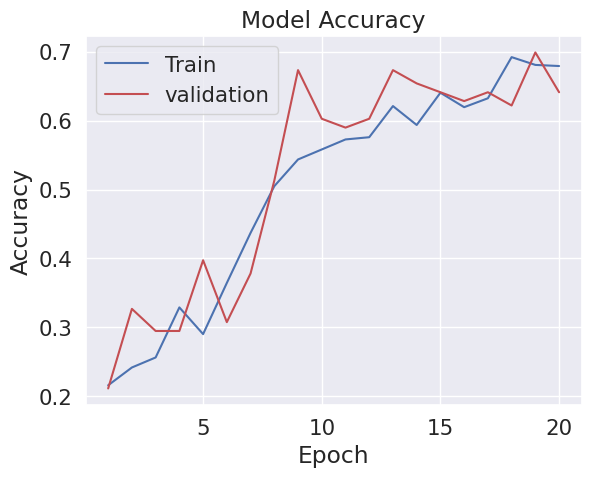

In [ ]:
accuracy_plot(ann_history)

In [ ]:
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model

# Create input layer
input_layer = Input(shape=(150, 150, 3))

# Get output layers of the ANN and CNN models
ann_output = ann_model(input_layer)
cnn_output = cnn_model(input_layer)

# Concatenate the output layers
concat_output = concatenate([ann_output, cnn_output])

# Add a dense layer to reshape the output
dense_layer = Dense(5, activation='softmax')(concat_output)

# Create the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=dense_layer)


In [ ]:
import tensorflow as tf
import numpy as np

# Convert the ensemble model to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(ensemble_model)
tflite_model = converter.convert()

# Save the tflite model to a file
with open('ensemble_model.tflite', 'wb') as f:
    f.write(tflite_model)